---


This analysis compares multiple linear regression and polynomial regression models using fish measurement data. It evaluates prediction accuracy through MSE, RMSE, R², and Adjusted R², and tests model performance on newly generated dummy data.

The objective of this analysis is to compare the performance of multiple linear regression and polynomial regression models in predicting the weight of fish based on their physical measurements (Length1, Length2, Length3, Height, and Width).

---

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import joblib

## Import Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Correlation Matrix

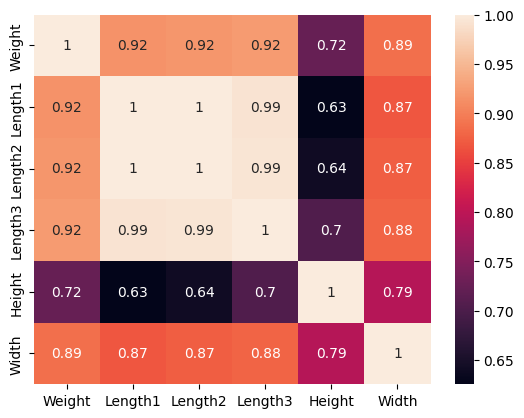

In [5]:
numerical_df = df.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Define x and y

In [6]:
X = df[['Length1', 'Length2', 'Length3', 'Width']]
y = df['Weight']

## Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Multiple Linear Regression

In [8]:
multiple_linear_reg = LinearRegression()

## Polynomial Regression

In [9]:
poly_reg = PolynomialFeatures(degree=3)

## Dictionary for Model Evaluation Results

In [10]:
a = {'Model Name':[],'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Squared_Error_MSE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,R2_score


## Model Evaluation

In [11]:
MM = [multiple_linear_reg,poly_reg]
# Get the feature names from your training data
feature_names = X_train.columns

for models in MM:
    y_pred = None  # Placeholder for predictions

    if models == multiple_linear_reg:
        models.fit(X_train, y_train)
        X_test = X_test[feature_names] # Ensure correct feature order
        y_pred = models.predict(X_test)
        joblib.dump(multiple_linear_reg, 'multiple_linear_reg_model.joblib')

    else: # Treat all other models as polynomial setup
        poly_reg_model = LinearRegression()

        # Transform training data
        X_train_poly = poly_reg.fit_transform(X_train)
        poly_reg_model.fit(X_train_poly, y_train)
        joblib.dump(poly_reg, 'poly_reg_model.joblib')
        joblib.dump(poly_reg_model, 'poly_reg_linear_model.joblib')

        # Ensure X_test has the same feature names and order
        X_test = X_test[feature_names]
        X_test_poly = poly_reg.transform(X_test) # Transform test data
        y_pred = poly_reg_model.predict(X_test_poly)

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1 - r_squared) * (len(y) - 1) / (len(y) - X.shape[1] - 1), 6)

    new_row = {
        'Model Name':models,
        'Adj_R_Square':adjusted_r_squared ,
        'Root_Mean_Squared_Error_RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'Mean_Squared_Error_MSE':metrics.mean_squared_error(y_test, y_pred),
        'R2_score':metrics.r2_score(y_test, y_pred)
    }

    test_result = {
        'Model Name':models,
        'Actual Output':y_test,
        'Predicted Output':y_pred
    }

    Results = pd.concat([Results, pd.DataFrame([new_row])], ignore_index=True)

## Model Evaluation Results

In [12]:
Results

,Model Name,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,R2_score
0,LinearRegression(),0.848845,134.338461,18046.822233,0.852672
1,PolynomialFeatures(degree=3),0.943654,82.020243,6727.320186,0.945080


## Visualizing the Actual vs Predicted Output

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


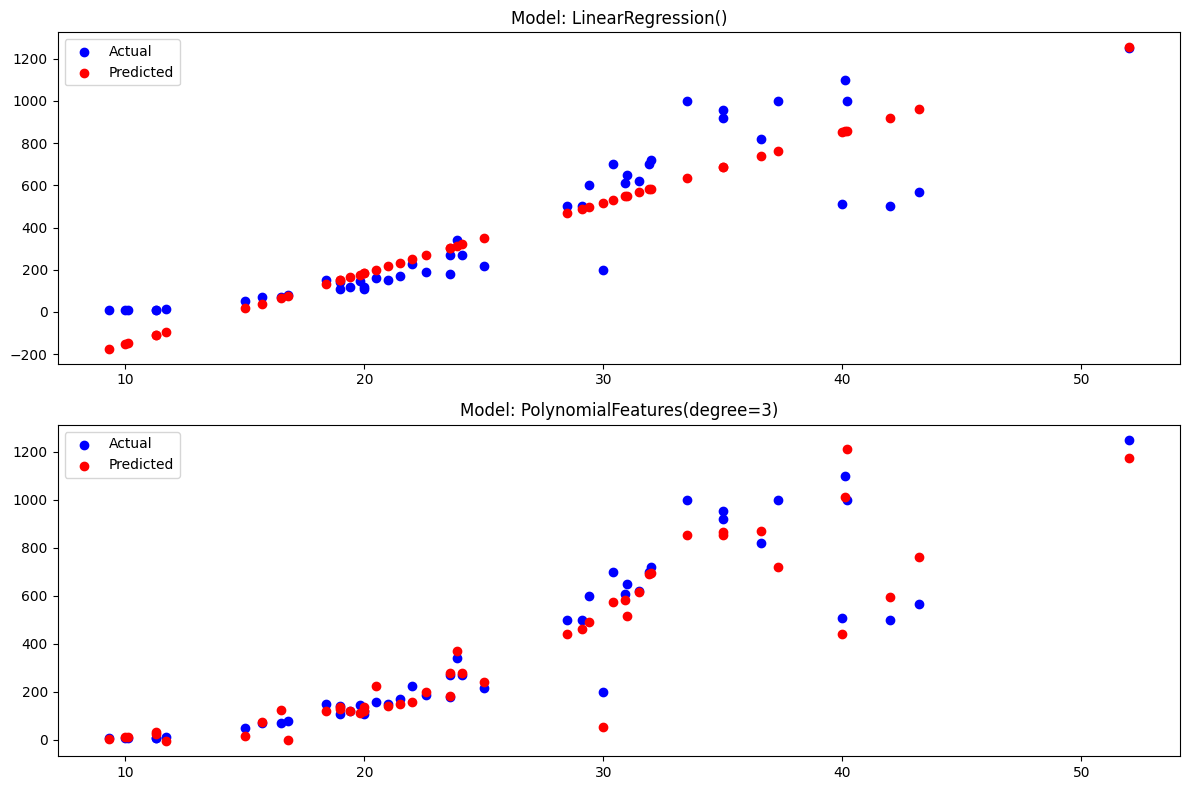

In [13]:
# Calculate the number of rows and columns for the subplots
num_models = len(MM)
num_rows = int(np.ceil(np.sqrt(num_models)))  # Calculate rows based on number of models
num_cols = int(np.ceil(num_models / num_rows))  # Calculate columns based on number of models

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))  # Create subplots outside the loop
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, models in enumerate(MM):
    # Initialize y_pred before the conditional blocks
    y_pred = None  # or any suitable default value

    if models == multiple_linear_reg:
        models.fit(X_train['Length1'].values.reshape(-1, 1), y_train) # Fit using 'Length1'
        X_test = X_test[feature_names]
        y_pred = models.predict(X_test[['Length1']])  # Predict on 'Length1' column

    else:
        # Create a LinearRegression model
        poly_reg_model = LinearRegression()

        # Transform the training data
        X_train_poly = poly_reg.fit_transform(X_train)
        poly_reg_model.fit(X_train_poly, y_train)

        # Ensure X_test has the same feature names and order
        X_test = X_test[feature_names]
        X_test_poly = poly_reg.transform(X_test)  # Transform test data
        y_pred = poly_reg_model.predict(X_test_poly)

    # Now plot on the specific subplot using axes[i]
    axes[i].scatter(X_test['Length1'], y_test, color='blue', label='Actual') # Plot against 'Length1'
    axes[i].scatter(X_test['Length1'], y_pred, color='red', label='Predicted') # Plot against 'Length1'
    axes[i].set_title(f'Model: {models}')
    axes[i].legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Testing Out Model

In [14]:
# Create dummy data
np.random.seed(42)

dummy_data = pd.DataFrame({
    'Length1': np.random.uniform(10, 80, 10),
    'Length2': np.random.uniform(10, 90, 10),
    'Length3': np.random.uniform(10, 100, 10),
    'Width': np.random.uniform(1, 15, 10)
})

print("Dummy Data:\n", dummy_data)

Dummy Data:
      Length1    Length2    Length3      Width
0  36.217808  11.646760  65.066761   9.505628
1  76.550001  87.592788  22.554447   3.387338
2  61.239576  76.595411  36.293018   1.910722
3  51.906094  26.987129  42.972566  14.284398
4  20.921305  24.545997  51.046299  14.518848
5  20.919616  24.672361  80.665837  12.317563
6  14.065853  34.339379  27.970640   5.264593
7  70.632330  51.980515  56.281099   2.367410
8  52.078051  44.555601  63.317311  10.579262
9  59.565080  33.298331  14.180537   7.162135


## Load Saved Models

In [15]:
multiple_linear_model = joblib.load('multiple_linear_reg_model.joblib')
poly_transformer = joblib.load('poly_reg_model.joblib')
poly_reg_model = joblib.load('poly_reg_linear_model.joblib')

## Predict using Multiple Linear Regression Model

In [16]:
mlr_predictions = multiple_linear_model.predict(dummy_data)
print("\nMultiple Linear Regression Predictions:\n", mlr_predictions)


Multiple Linear Regression Predictions:
 [ 404.74534798 1229.50094076 1135.42231128  734.7685154  1090.80583026
 1192.55394505  702.93397586  577.76620571 1124.65183781  176.92494747]


## Predict using Polynomial Regression Model

In [17]:
# Transform dummy data for Polynomial Regression
dummy_data_poly = poly_transformer.transform(dummy_data)

poly_predictions = poly_reg_model.predict(dummy_data_poly)
print("\nPolynomial Regression Predictions:\n", poly_predictions)


Polynomial Regression Predictions:
 [16308857.90528463   404000.20878339 -1919757.43775088 11396426.32123968
  -374277.57325501 -1216109.98006269 -2882565.3044146   2814930.67907267
   788983.87117038  7209259.67319274]
